<a href="https://colab.research.google.com/github/theresiabp/Colab-practice/blob/main/code_sample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Model Data Visualization (CMIP6)

Coupled Model Intercomparison Project (CMIP) are a set of coupled climate models organized under the World Climate Research Programme's (WCRP) Working Group on Coupled Modelling (WGCM). Since 2019, the latest CMIP data is made available publicly by Lamont-Doherty Earth Observatory (LDEO) of Columbia University and the Pangeo Project to host the latest climate simulation data in the google cloud.

In this script, we will focus on how to show average surface air temperature change according to climate projections from one of the earth-system model (GFDL-ESM4).

This script adapted from [Ali Ahmadalipour's tutorial](https://https://www.linkedin.com/pulse/python-climate-data-analysis-tutorial-code-ali-ahmadalipour/).


In [ ]:
# Install required packages
!pip install gcsfs                    # Accessing Google cloud project services
!pip install xarray[complete]         # Complete xarray package to be able to read zarr format
!pip install cartopy                  # Spatial data visualization

# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import gcsfs
import datetime
import os
import cartopy.crs as ccrs
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 38.5 MB/s eta 0:00:00
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25845 sha256=d1b6ef6aa3174c76e7f836379071368dedbadda02dc09dadb6c394f14a9649e2
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
  Crea

In [ ]:
# Read CMIP6 data from a CSV file
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

# Show the first few rows of the DataFrame
df.head()


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
# Get the unique source_id values (models) available in CMIP6
pd.unique(df['source_id'])

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'CanESM5',
       'SAM0-UNICON', 'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3',
       'EC-Earth3-Veg', 'FGOALS-f3-L', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

Other variables available in CMIP6: https://pcmdi.llnl.gov/mips/cmip3/variableList.html

In [ ]:
# Get the unique variable_id values (tas- surface air temperature)
pd.unique(df['variable_id'])

array(['ps', 'rsds', 'rlus', 'rlds', 'psl', 'prw', 'hurs', 'huss', 'hus',
       'hfss', 'rsus', 'evspsbl', 'rsdt', 'hfls', 'rsut', 'clt', 'zg',
       'ts', 'va', 'uas', 'vas', 'tauv', 'tauu', 'tas', 'ta', 'ua', 'pr',
       'prc', 'rsutcs', 'wtem', 'vtem', 'prsn', 'rlut', 'rlutcs',
       'tasmax', 'tasmin', 'emidust', 'emiss', 'mmrbc', 'mmrdust',
       'mmroa', 'mmrpm2p5', 'o3', 'mmrsoa', 'mmrss', 'od550lt1aer', 'oh',
       'emidms', 'mmrso4', 'cltc', 'ptp', 'airmass', 'ccb', 'cdnc', 'toz',
       'so2', 'rsutcsaf', 'wa', 'rlutcsaf', 'rlutaf', 'od870aer',
       'od550aer', 'abs550aer', 'rsutaf', 'snw', 'mrsos', 'mrso', 'mrro',
       'areacella', 'siconc', 'basin', 'mrros', 'mlotst', 'clivi', 'hur',
       'sfdsi', 'co2mass', 'rsntds', 'masso', 'soga', 'evspsblsoi', 'sos',
       'sosga', 'tauuo', 'sfcWind', 'clwvi', 'vo', 'vmo', 'uo', 'umo',
       'tosga', 'tauvo', 'tos', 'thetao', 'thetaoga', 'pbo', 'thkcello',
       'orog', 'volo', 'wfo', 'cllcalipso', 'evspsblpot', 'wap', '

In [ ]:
# Query data for the historical scenario and a specific model ('GFDL-ESM4')
df_historical = df.query("activity_id == 'CMIP' & table_id == 'Amon' & " +
                         "variable_id == 'tas' & experiment_id == 'historical' & member_id == 'r1i1p1f1'")
print('Length of df_historical:', len(df_historical))
df_historical.head(3)

Length of df_historical: 55


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
29231,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32351,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827


In climate models, we commonly see a term called 'scenario', to describe it simply it's about projections of what can happen or pathways of how to reach certain goals.

For CMIP5, the data is reported in Representative Concentration Pathways (RCPs) represent different emissions, concentration and radiative forcing projections. While in CMIP6, the pathways are documented based on alternative socio-economic developments.

Available Socio-economic pathways:
*   SSP 1-2.6: Sustainability
*   SSP 2-4.5: Middle of the Road
*   SSP 3-7.0: Regional Rivalry
*   SSP 5-8.5: Fossil-fuel development (business-as-usual)


In [ ]:
# Repeat the query for different SSP scenarios (ssp126, ssp245, ssp370, ssp585)
df_ssp126 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +
                     "variable_id == 'tas' & experiment_id == 'ssp126' & member_id == 'r1i1p1f1'")
print('Length of df_ssp126:', len(df_ssp126))
df_ssp126.head(3)

Length of df_ssp126: 33


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15886,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66455,ScenarioMIP,BCC,BCC-CSM2-MR,ssp126,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314
151017,ScenarioMIP,CCCma,CanESM5,ssp126,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429


In [ ]:
df_ssp245 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp245' & member_id == 'r1i1p1f1'")
print('Length of df_ssp245:', len(df_ssp245))     #table_id 'Amon' indicates monthly averages
df_ssp245.head(3)

Length of df_ssp245: 34


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2249,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
15454,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
47969,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp245,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119


In [ ]:
df_ssp370 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp370' & member_id == 'r1i1p1f1'")
print('Length of df_ssp370:', len(df_ssp245))
df_ssp370.head(3)

Length of df_ssp370: 34


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
13327,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
48256,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp370,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
55444,ScenarioMIP,MRI,MRI-ESM2-0,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190222


In [ ]:
df_ssp585 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp585:', len(df_ssp585))
df_ssp585.head(3)

Length of df_ssp585: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [ ]:
# Define the model of interest ('GFDL-ESM4') and get data store URLs
model = 'GFDL-ESM4'
zstore_hist = df_historical.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp585 = df_ssp585.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp126 = df_ssp126.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp245 = df_ssp245.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp370 = df_ssp370.query(f"source_id == '{model}'").zstore.values[0]

In [ ]:
# Initialize a GCS file system with an anonymous token
gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:
# Use the GCS file system to get data from the specified zarr stores
mapper = gcs.get_mapper(zstore_hist)
ds_hist = xr.open_zarr(mapper, consolidated=True)

In [ ]:
# Similar steps for other SSP scenarios (ssp585, ssp126, ssp245, ssp370)
mapper = gcs.get_mapper(zstore_ssp585)
ds_ssp585 = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp126)
ds_ssp126 = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp245)
ds_ssp245 = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp370)
ds_ssp370 = xr.open_zarr(mapper, consolidated = True)

In [ ]:
# Show information about the historical dataset
ds_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-10;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13a...
    version_id:             v20190726

In [ ]:
# Print date ranges for different scenarios (all of the SSPs should have the same time range)
print('hist date range  :', ds_hist.time[0].values, ' , ', ds_hist.time[-1].values)
print('ssp585 date range:', ds_ssp585.time[0].values, ' , ', ds_ssp585.time[-1].values)
print('ssp126 date range  :', ds_ssp126.time[0].values, ' , ', ds_ssp126.time[-1].values)
print('ssp245 date range:', ds_ssp245.time[0].values, ' , ', ds_ssp245.time[-1].values)
print('ssp370 date range  :', ds_ssp370.time[0].values, ' , ', ds_ssp370.time[-1].values)

hist date range  : 1850-01-16 12:00:00  ,  2014-12-16 12:00:00
ssp585 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00
ssp126 date range  : 2015-01-16 12:00:00  ,  2100-12-16 12:00:00
ssp245 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00
ssp370 date range  : 2015-01-16 12:00:00  ,  2100-12-16 12:00:00


In [ ]:
# Create new time coordinates for historical and SSP scenarios
# Adjusting start times to align all scenarios (initially some of the models starts at 01-16)
# Note: You may need to modify this code depending on your specific requirements
start_time = pd.to_datetime(datetime.date(1850, 1, 1))
time_new_hist = [start_time + pd.DateOffset(months=x) for x in range(len(ds_hist.time))]

In [ ]:
# Similar code for other SSP scenarios (ssp585, ssp126, ssp245, ssp370)
start_time = pd.to_datetime(datetime.date(2015,1,1))
time_new_ssp585 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp585.time))]
time_new_ssp126 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp126.time))]
time_new_ssp245 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp245.time))]
time_new_ssp370 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp370.time))]

In [ ]:
ds_hist = ds_hist.assign_coords(time = time_new_hist)
ds_ssp585 = ds_ssp585.assign_coords(time = time_new_ssp585)
ds_ssp126 = ds_ssp126.assign_coords(time = time_new_ssp126)
ds_ssp245 = ds_ssp245.assign_coords(time = time_new_ssp245)
ds_ssp370 = ds_ssp370.assign_coords(time = time_new_ssp370)

In [ ]:
# Select time ranges for analysis,
# we will use two different 30 yrs time period as in WMO classical climatology definition
# For historical record 1980-2010
start_date = pd.to_datetime(datetime.date(1980,1,1))
end_date = pd.to_datetime(datetime.date(2010,12,31))
ds_hist_sel = ds_hist.isel(time=(ds_hist.time >= start_date) & (ds_hist.time <= end_date))

start_date = pd.to_datetime(datetime.date(2070,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

In [ ]:
# Similar selection for other SSP scenarios (ssp585, ssp126, ssp245, ssp370)
# For all the SSPs, last 3 decade of the model projection (2070-2100)
start_date = pd.to_datetime(datetime.date(2070,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))
ds_ssp126_sel = ds_ssp126.isel(time=(ds_ssp126.time >= start_date) & (ds_ssp126.time <= end_date))
ds_ssp245_sel = ds_ssp245.isel(time=(ds_ssp245.time >= start_date) & (ds_ssp245.time <= end_date))
ds_ssp370_sel = ds_ssp370.isel(time=(ds_ssp370.time >= start_date) & (ds_ssp370.time <= end_date))


In [ ]:
# Load the selected data
ds_hist_sel.load()
ds_ssp585_sel.load()
ds_ssp126_sel.load()
ds_ssp245_sel.load()
ds_ssp370_sel.load()

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 360)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 0.0 1.25 1.25 2.5 ... 357.5 358.8 358.8 360.0
  * time       (time) datetime64[ns] 2070-01-01 2070-02-01 ... 2099-12-01
    time_bnds  (time, bnds) object 2070-01-01 00:00:00 ... 2100-01-01 00:00:00
Data variables:
    tas        (time, lat, lon) float32 243.6 243.6 243.6 ... 257.4 257.4 257.3
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/c4276885-d04a-40a8-bea6-e3e950f8c347
    version_id:             v20180701

In [ ]:
# Calculate average temperature for each month (historical, and all the SSPs)
tas_avg_hist = ds_hist_sel.groupby('time.month').mean()
tas_avg_ssp126 = ds_ssp126_sel.groupby('time.month').mean()
tas_avg_ssp245 = ds_ssp245_sel.groupby('time.month').mean()
tas_avg_ssp370 = ds_ssp370_sel.groupby('time.month').mean()
tas_avg_ssp585 = ds_ssp585_sel.groupby('time.month').mean()

# Calculate temperature change over 30 years
tas_30yr_ssp126 = tas_avg_ssp126 - tas_avg_hist
tas_30yr_ssp245 = tas_avg_ssp245 - tas_avg_hist
tas_30yr_ssp370 = tas_avg_ssp370 - tas_avg_hist
tas_30yr_ssp585 = tas_avg_ssp585 - tas_avg_hist

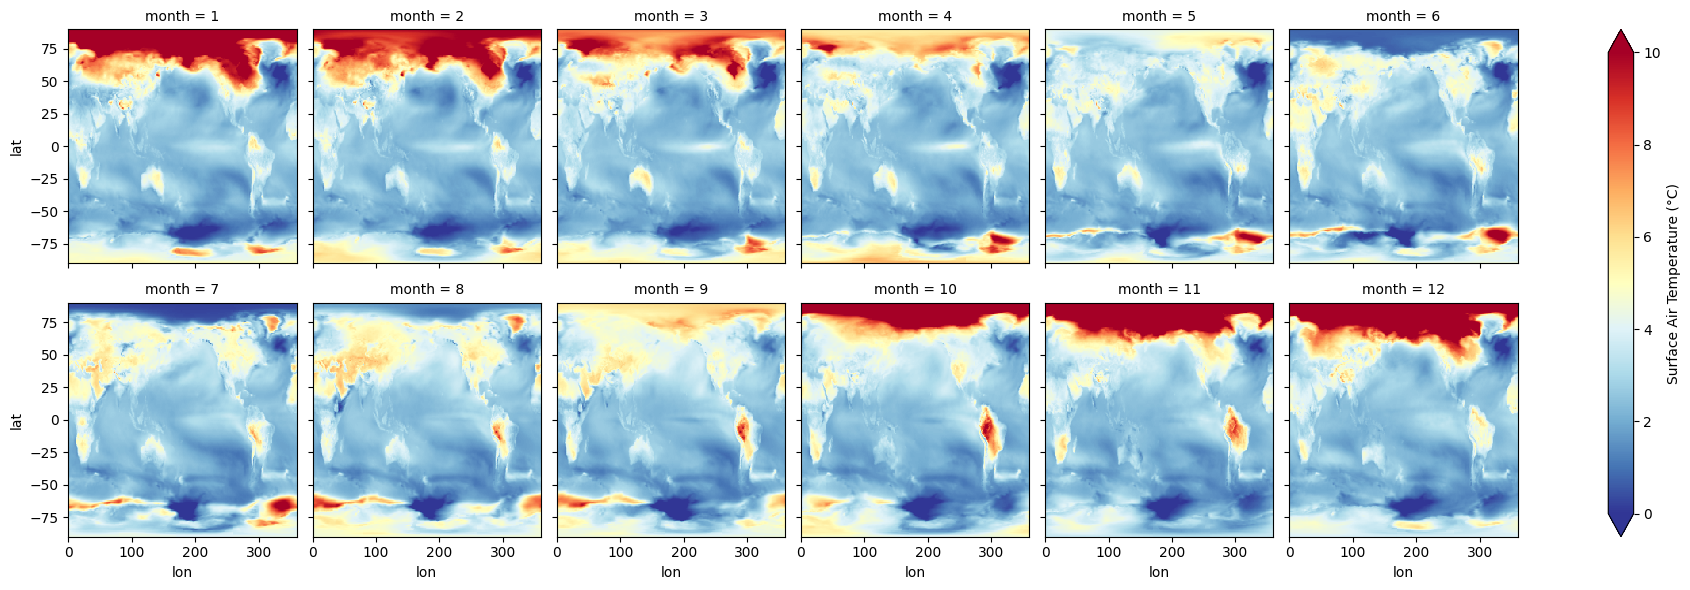

In [ ]:
# On the next two plots we will only use SSP 5.85 simulations to compare with historical data
# Plot temperature change for each month
tas_30yr_ssp585.tas.plot(col='month', col_wrap=6, vmax=10, vmin=0, cmap='RdYlBu_r',
                          cbar_kwargs={'label': 'Surface Air Temperature (°C)'})

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


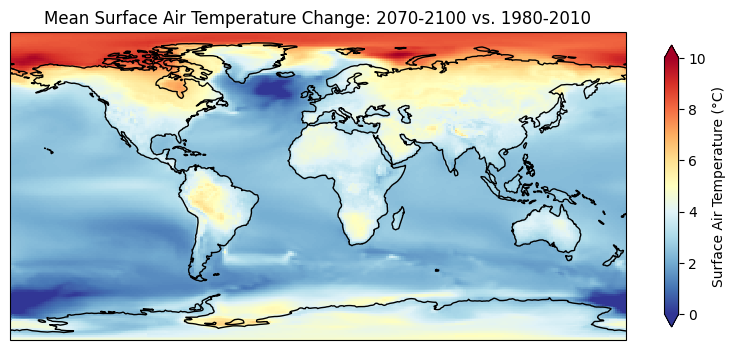

In [ ]:
# Create a figure with Cartopy projection for the ssp585 scenario
fig, ax = plt.subplots(figsize=[8, 5], subplot_kw={'projection': ccrs.PlateCarree()})

# Plot temperature change using Cartopy
tas_30yr_ssp585.mean('month').tas.plot(
    ax=ax,
    cmap='RdYlBu_r',
    vmin=0,
    vmax=10,
    cbar_kwargs={'label': 'Surface Air Temperature (°C)', 'shrink': 0.6}
)

# Add coastlines
ax.coastlines()

# Set plot title
plt.title('Mean Surface Air Temperature Change: 2070-2100 vs. 1980-2010')

plt.tight_layout()

# Show the plot
plt.show()

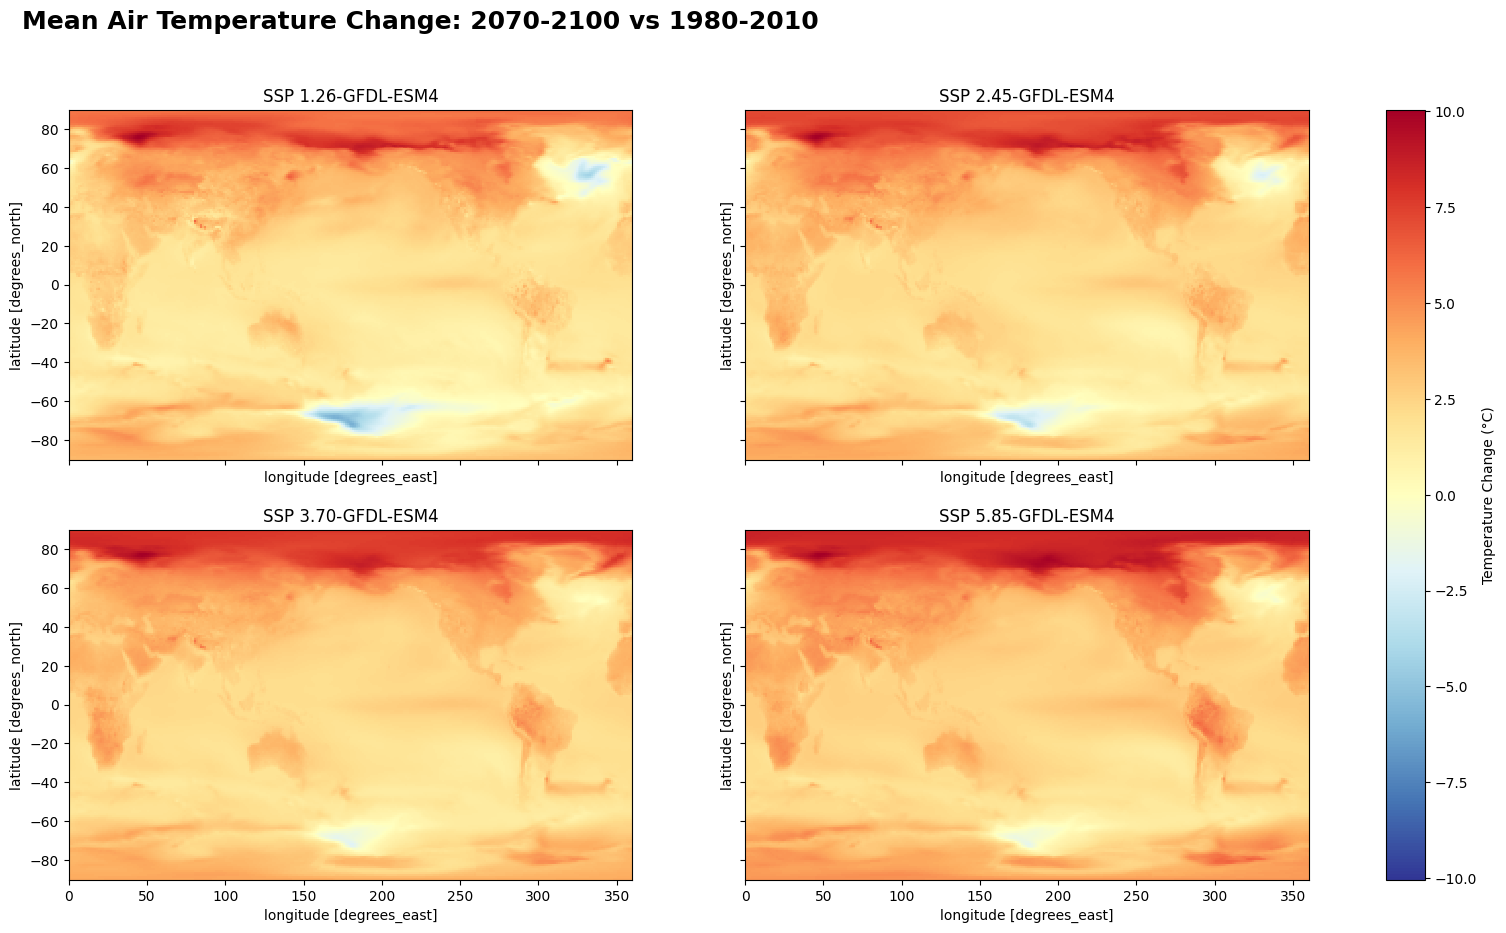

In [ ]:
# Create a figure with four subplots for different SSP scenarios
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[20, 10])

# Plot temperature change for SSP 1.26
ssp126 = tas_30yr_ssp126.tas.mean('month').plot(ax=axs[0, 0], cmap='RdYlBu_r', add_colorbar=False)
axs[0, 0].set_title(f'SSP 1.26-{model}')

# Plot temperature change for SSP 2.45
ssp245 = tas_30yr_ssp245.tas.mean('month').plot(ax=axs[0, 1], cmap='RdYlBu_r', add_colorbar=False)
axs[0, 1].set_title(f'SSP 2.45-{model}')

# Plot temperature change for SSP 3.70
ssp370 = tas_30yr_ssp370.tas.mean('month').plot(ax=axs[1, 0], cmap='RdYlBu_r', add_colorbar=False)
axs[1, 0].set_title(f'SSP 3.70-{model}')

# Plot temperature change for SSP 5.85
ssp585 = tas_30yr_ssp585.tas.mean('month').plot(ax=axs[1, 1], cmap='RdYlBu_r', add_colorbar=False)
axs[1, 1].set_title(f'SSP 5.85-{model}')

# Configure a common colorbar using the color scale from the ssp5.85 plot
cbar = fig.colorbar(ssp585, ax=axs, orientation='vertical')
cbar.set_label('Temperature Change (°C)')
plt.suptitle('Mean Air Temperature Change: 2070-2100 vs 1980-2010', ha='right',
             weight='bold',
             fontsize=18)

plt.show()


Another commonly used type of graphs to display climate projection is time-series line plot. In this example we will only use one region to calculate their average annual temperature change.

In [ ]:
# Select data for Florida region

# Calculate average annual temperature change for Florida region
# Define latitude and longitude boundaries for Florida
left = 247
right = 281
bottom = 24.7
top = 31.2


start_date_fl = pd.to_datetime(datetime.date(1950, 1, 1))
end_date_fl = pd.to_datetime(datetime.date(2015, 12, 31))
ds_hist_sel_fl = ds_hist.isel(time=(ds_hist.time >= start_date_fl) & (ds_hist.time <= end_date_fl))

# Similar selections for other SSP scenarios (ssp585, ssp126, ssp245, ssp370)
start_date_fl = pd.to_datetime(datetime.date(2015,1,1))
end_date_fl = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel_fl = ds_ssp585.isel(time=(ds_ssp585.time >= start_date_fl) & (ds_ssp585.time <= end_date_fl))
ds_ssp126_sel_fl = ds_ssp126.isel(time=(ds_ssp126.time >= start_date_fl) & (ds_ssp126.time <= end_date_fl))
ds_ssp245_sel_fl = ds_ssp245.isel(time=(ds_ssp245.time >= start_date_fl) & (ds_ssp245.time <= end_date_fl))
ds_ssp370_sel_fl = ds_ssp370.isel(time=(ds_ssp370.time >= start_date_fl) & (ds_ssp370.time <= end_date_fl))

# Calculate mean temperature for the Florida region
tas_FL_yr_hist = ds_hist_sel_fl.isel(
    lat=(ds_hist_sel_fl.lat >= bottom) & (ds_hist_sel_fl.lat <= top),
    lon=(ds_hist_sel_fl.lon >= left) & (ds_hist_sel_fl.lon <= right),
).mean(['lat', 'lon']).drop(['bnds', 'height', 'time_bnds'])

# Similar calculations for other SSP scenarios (ssp585, ssp126, ssp245, ssp370)
tas_FL_yr_ssp585 = ds_ssp585_sel_fl.isel(lat = (ds_ssp585_sel_fl.lat>=bottom) & (ds_ssp585_sel_fl.lat<=top),
                   lon = (ds_ssp585_sel_fl.lon>=left) & (ds_ssp585_sel_fl.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_FL_yr_ssp126 = ds_ssp126_sel_fl.isel(lat = (ds_ssp126_sel_fl.lat>=bottom) & (ds_ssp126_sel_fl.lat<=top),
                   lon = (ds_ssp126_sel_fl.lon>=left) & (ds_ssp126_sel_fl.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_FL_yr_ssp245 = ds_ssp245_sel_fl.isel(lat = (ds_ssp245_sel_fl.lat>=bottom) & (ds_ssp245_sel_fl.lat<=top),
                   lon = (ds_ssp245_sel_fl.lon>=left) & (ds_ssp245_sel_fl.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])
tas_FL_yr_ssp370 = ds_ssp370_sel_fl.isel(lat = (ds_ssp370_sel_fl.lat>=bottom) & (ds_ssp370_sel_fl.lat<=top),
                   lon = (ds_ssp370_sel_fl.lon>=left) & (ds_ssp370_sel_fl.lon<=right),
                   ).mean(['lat','lon']).drop(['bnds', 'height', 'time_bnds'])

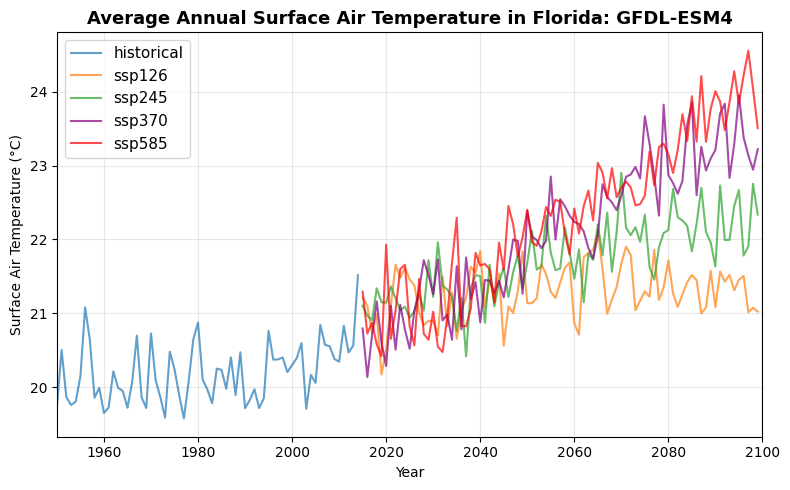

In [ ]:
# Plot average annual temperature change in Florida
plt.figure(figsize=[8, 5])
(tas_FL_yr_hist.groupby('time.year').mean().tas - 273.15).plot(
    label='historical', alpha=0.7)
(tas_FL_yr_ssp126.groupby('time.year').mean().tas - 273.15).plot(
    label='ssp126', alpha=0.7)
(tas_FL_yr_ssp245.groupby('time.year').mean().tas - 273.15).plot(
    label='ssp245', alpha=0.7)
(tas_FL_yr_ssp370.groupby('time.year').mean().tas - 273.15).plot(
    label='ssp370', color='purple', alpha=0.7)
(tas_FL_yr_ssp585.groupby('time.year').mean().tas - 273.15).plot(
    label='ssp585', color='r', alpha=0.7)
plt.grid(alpha=0.3)
plt.xlim([1950, 2100])
plt.legend(fontsize=11)
plt.ylabel('Surface Air Temperature (°C)')
plt.xlabel('Year')
plt.title(f'Average Annual Surface Air Temperature in Florida: {model}',
          fontsize=13, weight='bold')

plt.tight_layout()
